(Source: http://www.scipy-lectures.org/packages/scikit-learn/index.html#basic-principles-of-machine-learning-with-scikit-learn)

In [1]:
%matplotlib notebook

## Estimators

Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: `sklearn.linear_model.LinearRegression`

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [4]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [5]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

In [6]:
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [7]:
model.fit(X, y)

/Users/greg/code/gkiar/sklearn-tutorials/env/sklearn/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
model.coef_

array([1.])

## Supervised Learning: Classifcation and Regression

In [9]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

> What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?

In [11]:
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


<IPython.core.display.Javascript object>


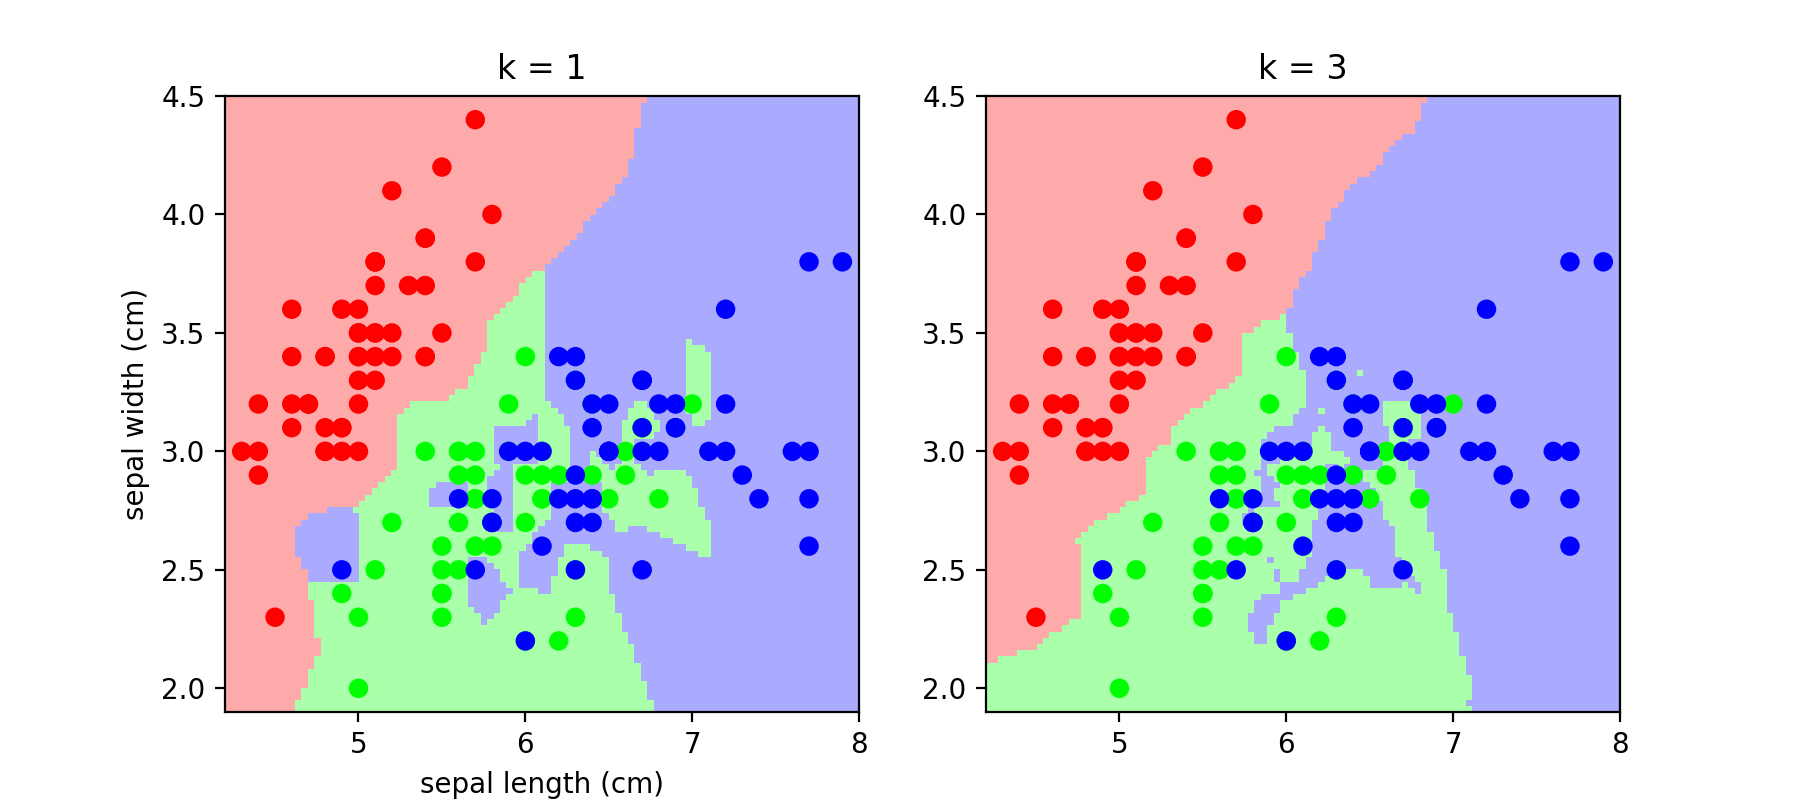

In [12]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this by using a 2D dataset
y = iris.target

number_of_neighbors = [1, 3]

plt.figure(figsize=(9, 4))
for idx, neighbor_number in enumerate(number_of_neighbors):
    knn = neighbors.KNeighborsClassifier(n_neighbors=neighbor_number)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.subplot(1,2,idx+1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    if idx == 0:
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
        plt.axis('tight')

    plt.title('k = {0}'.format(neighbor_number))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

plt.show()

## Estimator interface summary

http://www.scipy-lectures.org/packages/scikit-learn/index.html#a-recap-on-scikit-learn-s-estimator-interface

## Regularization

Train errors Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

 - Train set error is not a good measurement of prediction performance. You need to leave out a test set.
 - In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ‘’simpler’‘, even if they lead to more errors on the train set.

As an example, let’s generate with a 9th order polynomial, with noise:

<IPython.core.display.Javascript object>


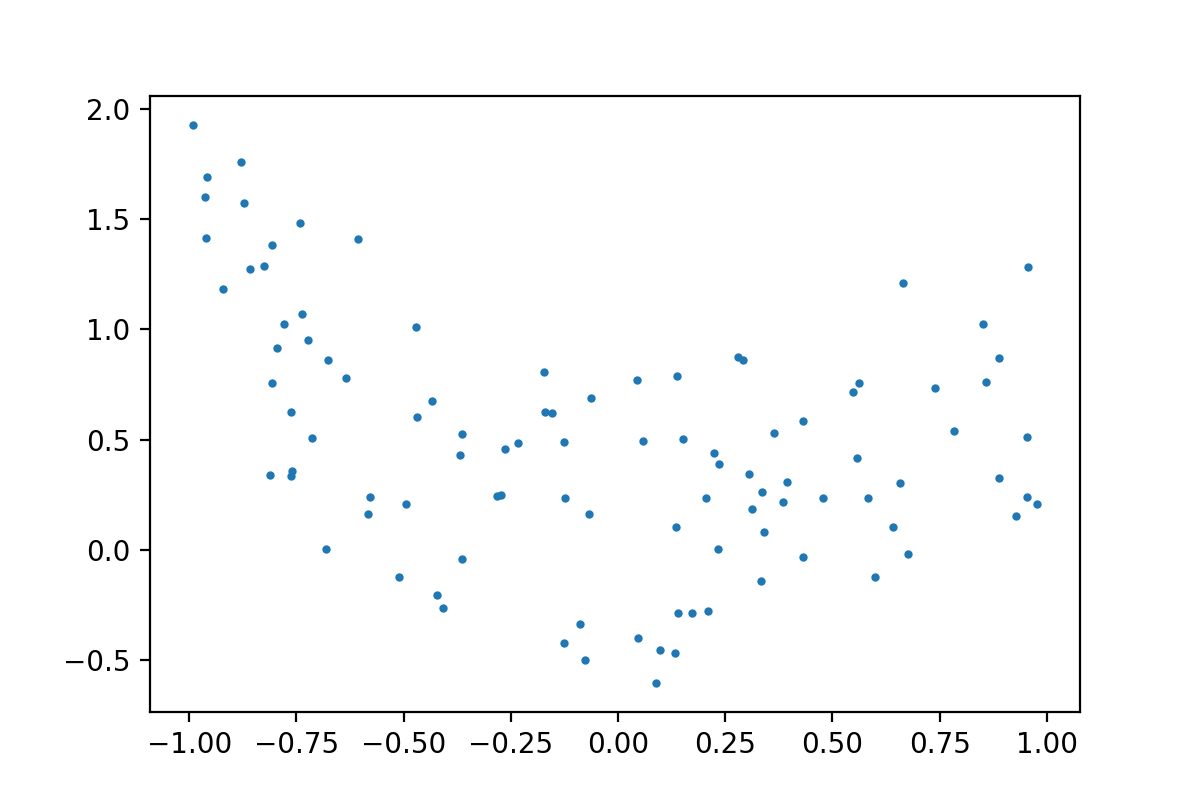

In [13]:
from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

<IPython.core.display.Javascript object>


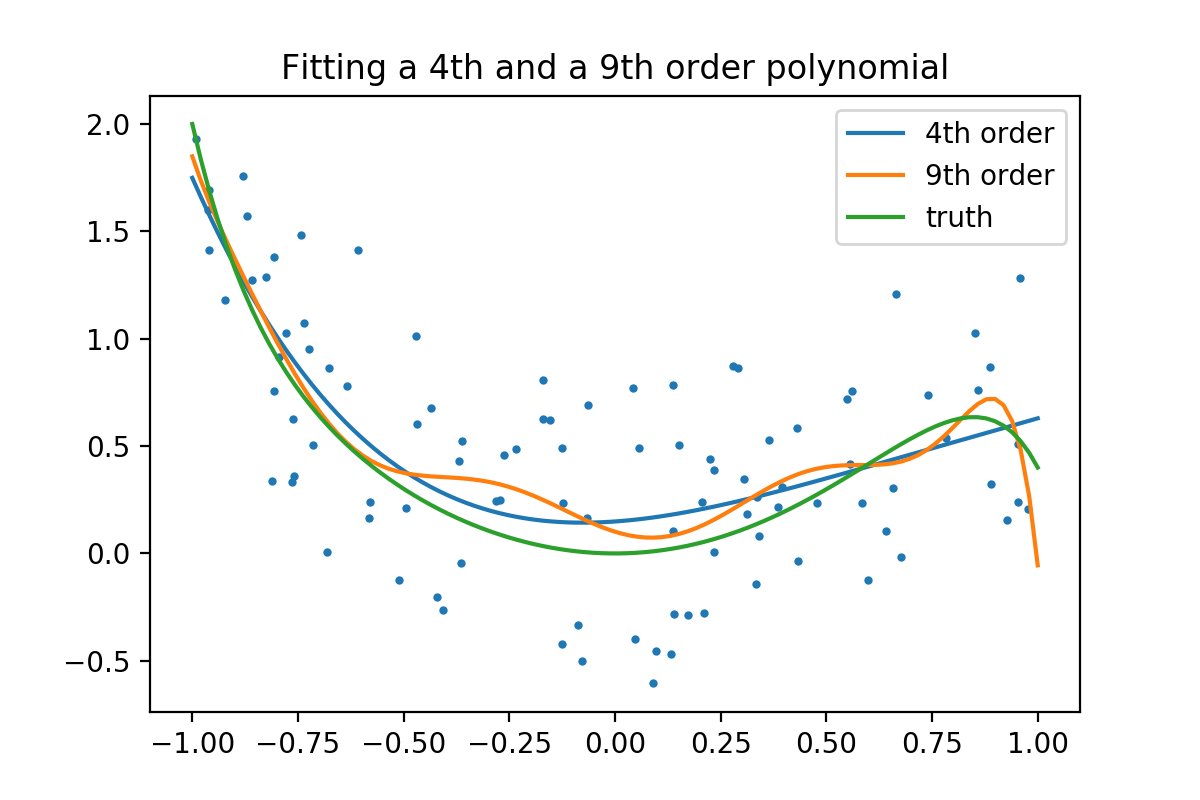

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.plot(x_test, f(x_test), label="truth")
plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

plt.show()

Similar example for classification: http://www.scipy-lectures.org/packages/scikit-learn/index.html#simple-versus-complex-models-for-classification